<a href="https://colab.research.google.com/github/distinctkemi/distinctkemi/blob/main/Food_waste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The world's population has grown and become wealthier, which has resulted in a sharp rise in the demand for food, energy, and water. The need for all three has increased, and they are all closely related to one another: food production necessitates both water and energy, traditional energy production needs water resources, and agriculture offers a possible supply of energy. This project focuses on how food affects the environment and how much carbom is been emitted from food if wasted. 

### About the dataset

This dataset contains most 43 most common foods grown across the globe and 23 columns as their respective land, water usage and carbon footprints.

**Columns**

`Food product`: Contains the common foods across the world

`Land use change`: Greenhouse emmisions(Kg CO2 - equivalents per kg product)

`Animal Feed`: Greenhouse emmisions (Kg CO2 - equivalents per kg product)

`Farm`: Greenhouse emmisions (Kg CO2 - equivalents per kg product)

`Processing`: - Kg CO2 - equivalents per kg product

`Transport`: - Kg CO2 - equivalents per kg product

`Packaging` - Kg CO2 - equivalents per kg product

`Retail` - Kg CO2 - equivalents per kg product

`Total Emission`: Sum of greenhouse emssion from land use change, animal feed, farm, processing, transport, packaging, retail, total emissions

In [ ]:
#Imoorting libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


In [ ]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.tools as tls

%matplotlib inline

In [ ]:
#loading dataset
df = pd.read_csv('/content/Food_Production.csv', index_col='Food product')
df.head()

,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
Food product,,,,,,,,,,,,,,,,,,,,,
Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.23,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [ ]:
#Checking the size of the data
df.shape

(43, 23)

> There are 53 rows and 23 columns in the dataset

In [ ]:
#Checking the information about the columns in dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 11 to 33
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43

> The above result indicates that the columns are of the correct data type and that there are missing values in some columns from colun index 9 to 22.

In [ ]:
#Checking the number of missing values in each column
df.isnull().sum()

Food product                                                                0
Land use change                                                             0
Animal Feed                                                                 0
Farm                                                                        0
Processing                                                                  0
Transport                                                                   0
Packging                                                                    0
Retail                                                                      0
Total_emissions                                                             0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   10
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                    5
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      16
Freshwater withdrawals per 1000kcal (liters per 1000kcal)       

> As expected, there are missing values in many columns from index 9 downwards as we can see from the result above.


In [ ]:
#Handling missing values by replacing with 0
df= df.fillna(0)

In [ ]:
#Summary statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Land use change,43.0,1.260465,3.357730,-2.1,0.000000,0.200000,0.800000,16.300000
Animal Feed,43.0,0.453488,0.919200,0.0,0.000000,0.000000,0.000000,2.900000
Farm,43.0,3.469767,7.083264,0.1,0.350000,0.800000,2.200000,39.400000
Processing,43.0,0.253488,0.372475,0.0,0.000000,0.100000,0.300000,1.300000
Transport,43.0,0.195349,0.158795,0.0,0.100000,0.100000,0.200000,0.800000
Packging,43.0,0.269767,0.342633,0.0,0.100000,0.100000,0.300000,1.600000
Retail,43.0,0.069767,0.110270,0.0,0.000000,0.000000,0.150000,0.300000
Total_emissions,43.0,5.972093,10.501753,0.2,0.850000,1.600000,6.000000,59.600000
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),43.0,20.860257,42.173510,0.0,0.957716,4.754098,17.296663,197.357143
Eutrophying emissions per kilogram (gPO₄eq per kilogram),43.0,40.776047,79.151355,0.0,2.350000,10.650000,36.165000,365.290000


> The minimum kg of carbon emission from any food product is 0.2 while the maximum is 59.6 after production according to the statistic summary above.

In [ ]:
#What food product emits the highest co2 after production
df.nlargest(10,['Total_emissions']).T

,33,35,39,34,32,31,42,16,36,37
Food product,Beef (beef herd),Lamb & Mutton,Cheese,Beef (dairy herd),Dark Chocolate,Coffee,Shrimps (farmed),Palm Oil,Pig Meat,Poultry Meat
Land use change,16.3,0.5,4.5,0.9,14.3,3.7,0.2,3.1,1.5,2.5
Animal Feed,1.9,2.4,2.3,2.5,0.0,0.0,2.5,0.0,2.9,1.8
Farm,39.4,19.5,13.1,15.7,3.7,10.4,8.4,2.1,1.7,0.7
Processing,1.3,1.1,0.7,1.1,0.2,0.6,0.0,1.3,0.3,0.4
Transport,0.3,0.5,0.1,0.4,0.1,0.1,0.2,0.2,0.3,0.3
Packging,0.2,0.3,0.2,0.3,0.4,1.6,0.3,0.9,0.3,0.2
Retail,0.2,0.2,0.3,0.2,0.0,0.1,0.2,0.0,0.2,0.2
Total_emissions,59.6,24.5,21.2,21.1,18.7,16.5,11.8,7.6,7.2,6.1
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),110.406593,30.640379,25.418605,133.805861,16.843327,197.357143,0.0,1.207014,31.958159,26.324324


> According to the above results, the top ten foods that emit the most carbon after production are:
1. `Beef (beef herd)`: 59.6 kg
2. `Lamb & Mutton`:




In [ ]:
#What food product emits the highest co2 
df.nlargest(10,['Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)']).T

,32,33,31,35,20,34,28,6,27,39
Food product,Dark Chocolate,Beef (beef herd),Coffee,Lamb & Mutton,Tomatoes,Beef (dairy herd),Berries & Grapes,Cassava,Apples,Cheese
Land use change,14.3,16.3,3.7,0.5,0.4,0.9,0.0,0.6,0.0,4.5
Animal Feed,0.0,1.9,0.0,2.4,0.0,2.5,0.0,0.0,0.0,2.3
Farm,3.7,39.4,10.4,19.5,0.7,15.7,0.7,0.2,0.2,13.1
Processing,0.2,1.3,0.6,1.1,0.0,1.1,0.0,0.0,0.0,0.7
Transport,0.1,0.3,0.1,0.5,0.2,0.4,0.2,0.1,0.1,0.1
Packging,0.4,0.2,1.6,0.3,0.1,0.3,0.2,0.0,0.0,0.2
Retail,0.0,0.2,0.1,0.2,0.0,0.2,0.0,0.0,0.0,0.3
Total_emissions,18.7,59.6,16.5,24.5,1.4,21.1,1.1,0.9,0.3,21.2
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),16.843327,110.406593,197.357143,30.640379,39.526316,133.805861,10.736842,0.708419,3.020833,25.418605


In [ ]:
#What food product emits the highest co2 
df.nlargest(10,['Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)']).T

,31,33,35,34,20,32,41,39,37,38
Food product,Coffee,Beef (beef herd),Lamb & Mutton,Beef (dairy herd),Tomatoes,Dark Chocolate,Fish (farmed),Cheese,Poultry Meat,Milk
Land use change,3.7,16.3,0.5,0.9,0.4,14.3,0.5,4.5,2.5,0.5
Animal Feed,0.0,1.9,2.4,2.5,0.0,0.0,0.8,2.3,1.8,0.2
Farm,10.4,39.4,19.5,15.7,0.7,3.7,3.6,13.1,0.7,1.5
Processing,0.6,1.3,1.1,1.1,0.0,0.2,0.0,0.7,0.4,0.1
Transport,0.1,0.3,0.5,0.4,0.2,0.1,0.1,0.1,0.3,0.1
Packging,1.6,0.2,0.3,0.3,0.1,0.4,0.1,0.2,0.2,0.1
Retail,0.1,0.2,0.2,0.2,0.0,0.0,0.0,0.3,0.2,0.3
Total_emissions,16.5,59.6,24.5,21.1,1.4,18.7,5.1,21.2,6.1,2.8
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),197.357143,110.406593,30.640379,133.805861,39.526316,16.843327,131.351955,25.418605,26.324324,17.75


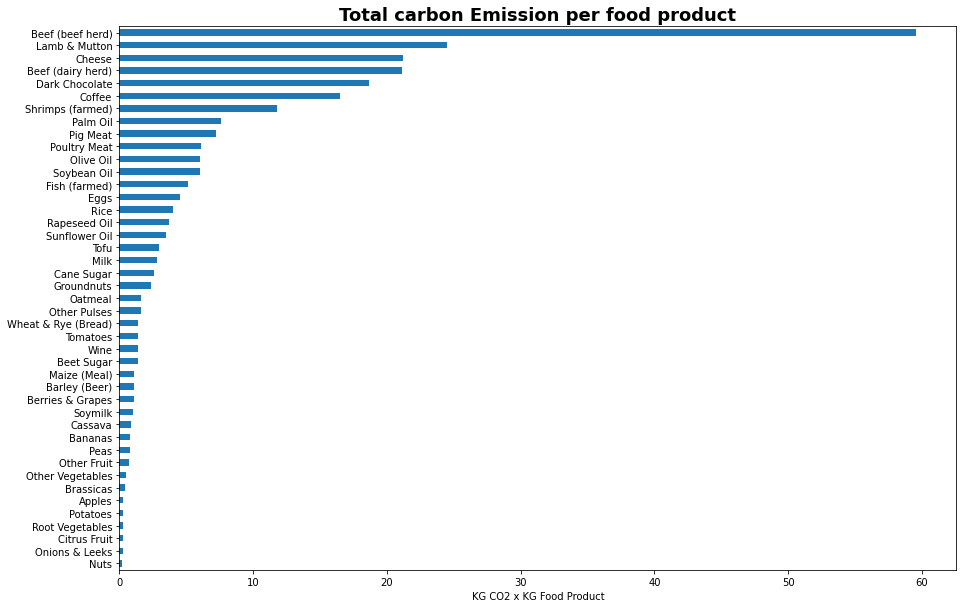

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plotting the ranking of food product that emits CO2 emission the most from highest to lowest
df= df.sort_values(['Total_emissions'])

plt.subplots(figsize = (15,10))

df.Total_emissions.plot(kind = 'barh')

plt.title('Total carbon Emission per food product',fontsize = 18, fontweight = "bold")
plt.xlabel('KG CO2 x KG Food Product',fontsize = 10)
plt.ylabel('')

plt.show()
plt.savefig('Ttotal emission per food')

> The plot ablove shows that the top five food products that generate the highest co2 are; Beef (beef herd), lamob & mutton, cheese, beef(dairy herd) and dark chocolate and we can asuume that protein source food emits the largest volume of carbon emssition out of the food products,from land usage to transporting to packaging. We can assume that beef and other proteins have high carbon emission due to their weights.

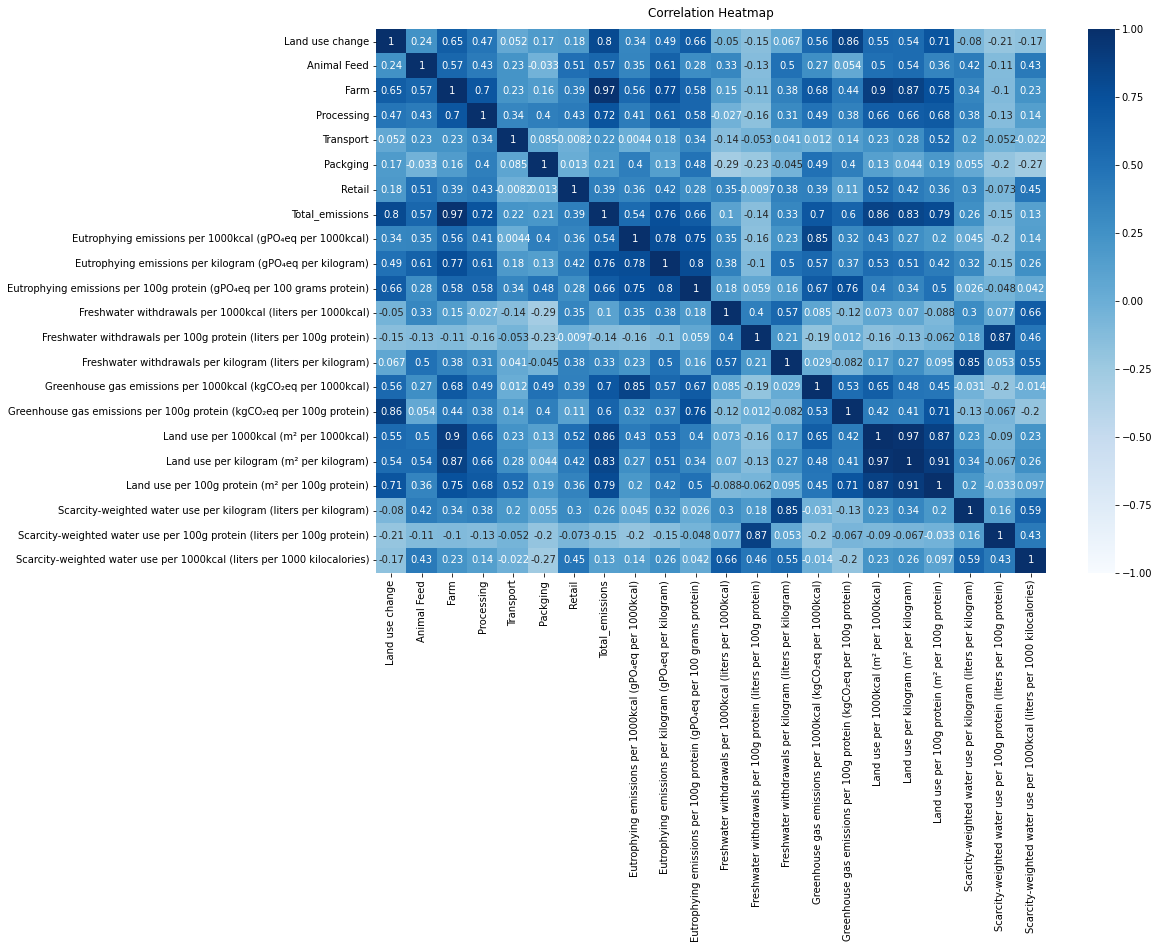

In [ ]:
# Plotting the heatmap of the variables.
plt.figure(figsize=(15, 10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap = 'Blues')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

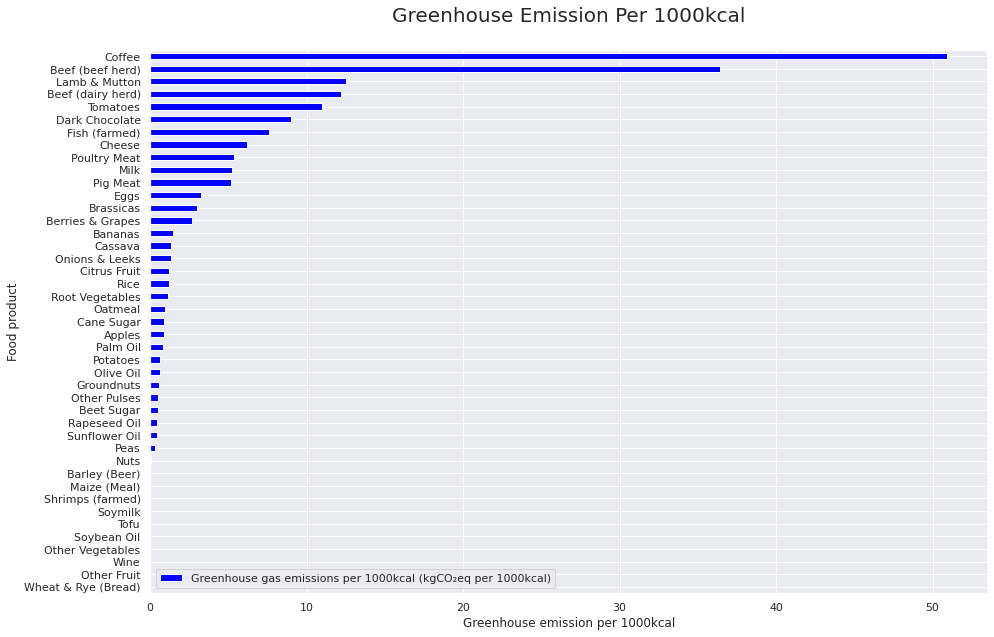

In [ ]:
#Plot of weight of green house gas emission per kcal of food product 
emission= df.sort_values(by= 'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)', ascending= True)[['Food product',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
emission.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "blue")
plt.xlabel("Greenhouse emission per 1000kcal")
plt.title("Greenhouse Emission Per 1000kcal\n", size= 20)
plt.show()

> The visualisation shows that coffee has the largest weight of green house emssion per calorie followed by beef and lamb, with the lowest or zero greenhouse emission from wine, soybean oil, soymilk, beer, shrimps and nuts.

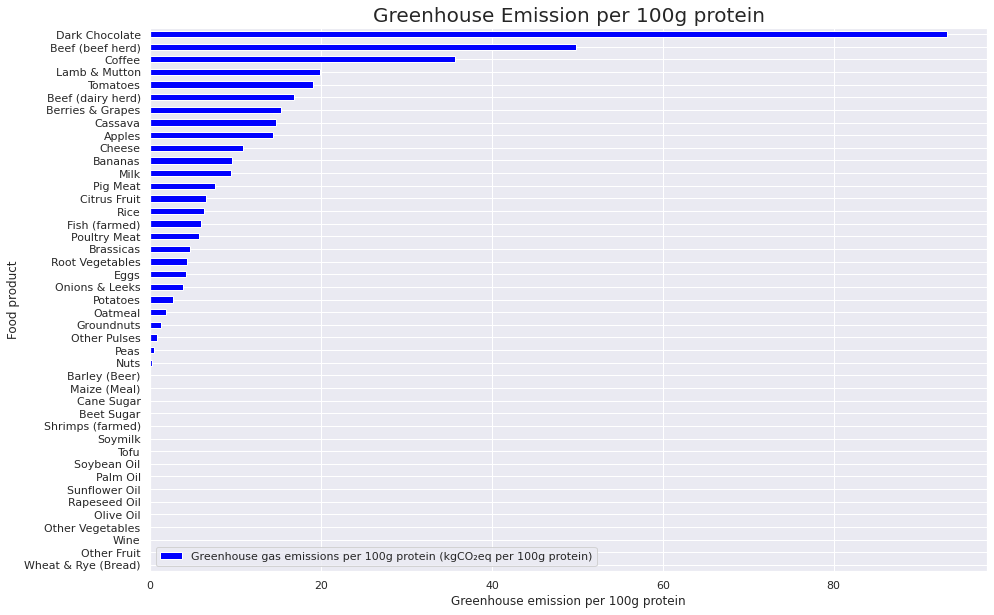

In [ ]:
b= df.sort_values(by= 'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)', ascending= True)[['Food product',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
b.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "blue")
plt.xlabel("Greenhouse emission per 100g protein")
plt.title("Greenhouse Emission per 100g protein", size= 20)
plt.show()



What is Eutrophication?



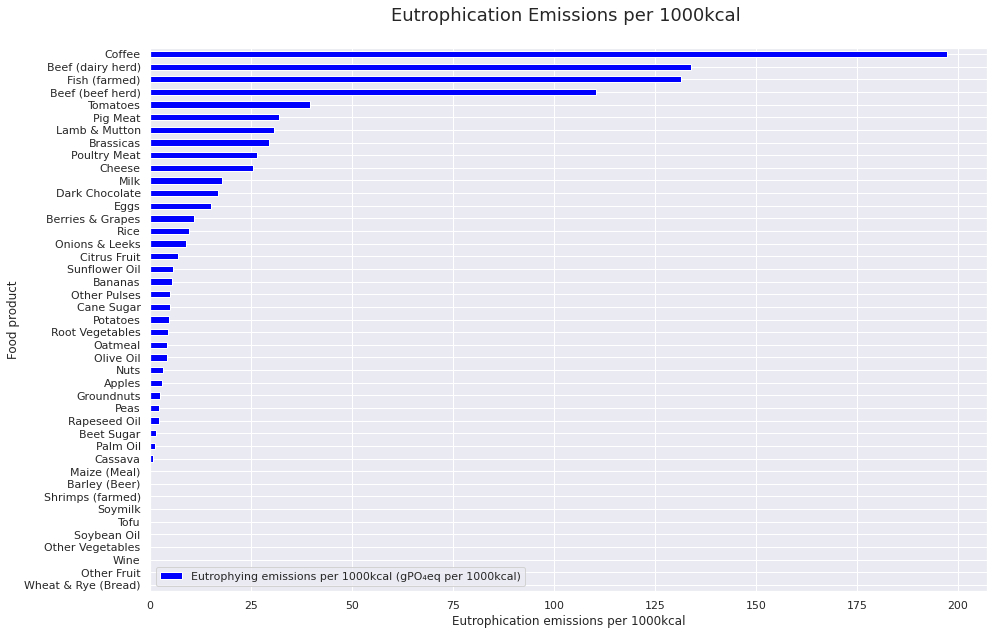

In [ ]:
#comparing eutrophication emissions

eutro_df= df.sort_values(by= 'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)', ascending= True)[['Food product',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
eutro_df.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "blue")
plt.xlabel('Eutrophication emissions per 1000kcal')
plt.title('Eutrophication Emissions per 1000kcal \n', size= 18);

> Coffee, beef, fish and tomatoes do the most eutrophication emission with respect to energy per 1000kcal, we can also see that most plant foods emit  less eutrophication.

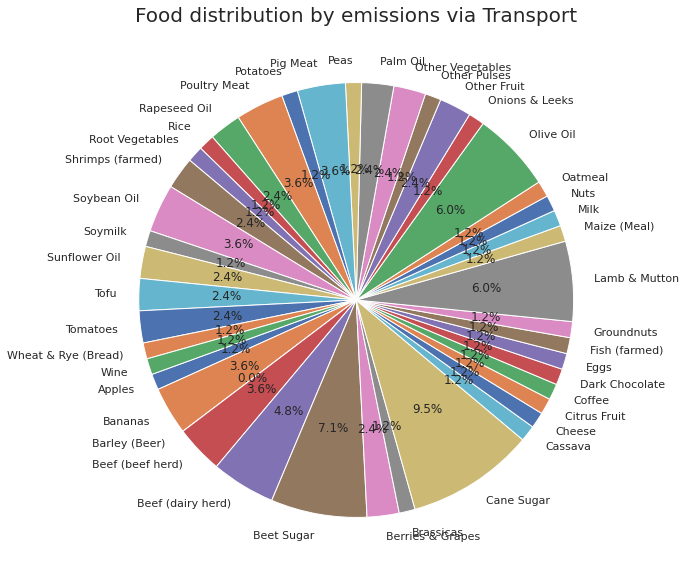

In [ ]:
plt.figure(figsize=(10,10))
temp_series = df.groupby('Food product')['Transport'].sum()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Food distribution by emissions via Transport", fontsize=20)
plt.show()

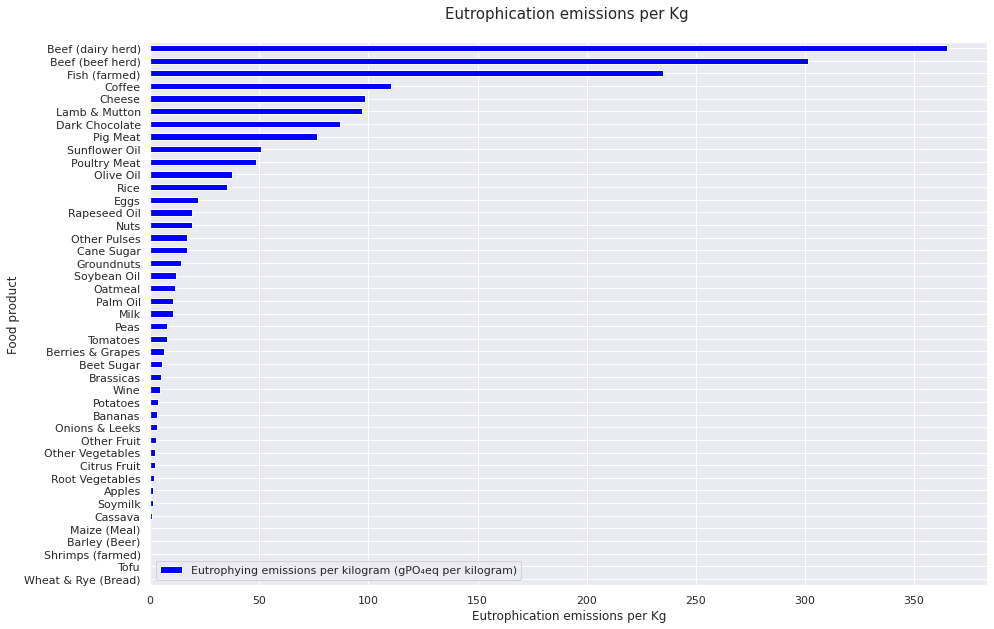

In [ ]:

ef= df.dropna().sort_values(by= 'Eutrophying emissions per kilogram (gPO₄eq per kilogram)', ascending= True)[['Food product',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)']]

fig, ax = plt.subplots(figsize=(15,10))
sns.set()
ef.set_index('Food product').plot(kind='barh', stacked=True, ax= ax, color= "blue")
plt.xlabel('Eutrophication emissions per Kg')
plt.title('Eutrophication emissions per Kg \n', size= 15)
plt.show()